In [6]:
from dasquakes import *
import datetime
import numpy as np

# 1. Choose the following parameters to select data to examine

In [ ]:
cable='whidbey'
record_length = 1 #minutes
t0 = datetime.datetime(2022, 5, 8, 0, 0, 0)

# 2. Run the functions to return the data

In [ ]:
prefix, network_name, datastore = data_wrangler(cable,record_length,t0)

data,dates,attrs = open_sintela_file(prefix,
                                     t0,
                                     datastore,
                                     number_of_files=record_length,
                                     verbose=False)

# 3. Use $attrs$ to see the aquisition parameters

In [21]:
nt = data.shape[0]
nx = data.shape[1]
print(f'Number of time steps: {nt}, Number of channels: {nx}')

print (f"Nyquist Frequency: {attrs['MaximumFrequency']} Hz, cable length: {attrs['SpatialSamplingInterval']*nx} m")

Number of time steps: 6000, Number of channels: 1720
Nyquist Frequency: 50.0 Hz, cable length: 10975.238056182861 m


# 4. Make a simple plot of the data

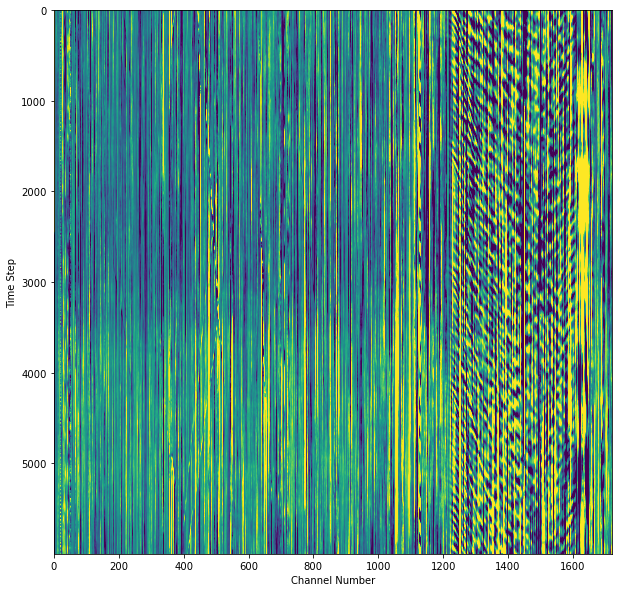

In [14]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,10))
plt.imshow(data,aspect='auto',vmin=-1,vmax=1)
plt.xlabel('Channel Number')
plt.ylabel('Time Step')
plt.show()

In [9]:
cable='seadasn'
record_length = 3 #minutes
t0 = datetime.datetime(2022, 5, 2, 0, 0, 0)

In [22]:
prefix, network_name, datastore = data_wrangler(cable,record_length,t0)

data,dates,attrs = open_sintela_file(prefix,
                                     t0,
                                     datastore,
                                     number_of_files=record_length,
                                     verbose=False)

# channel_range = [100,150]
# data = data[:,channel_range[0]:channel_range[1]]

# t_range = [date]

In [23]:
nt = data.shape[0]
nx = data.shape[1]
print(f'Number of time steps: {nt}, Number of channels: {nx}')

print (f"Nyquist Frequency: {attrs['MaximumFrequency']} Hz, cable length: {attrs['SpatialSamplingInterval']*nx} m")

Number of time steps: 18000, Number of channels: 1749
Nyquist Frequency: 50.0 Hz, cable length: 11160.285674571991 m


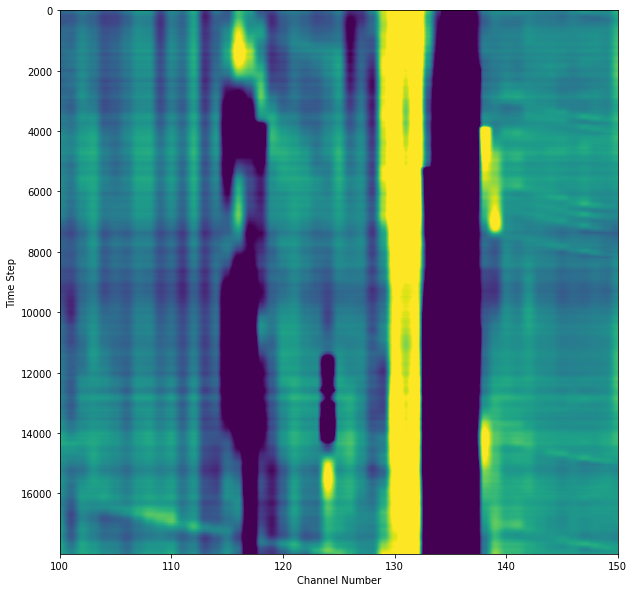

In [27]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,10))
plt.imshow(data,aspect='auto',vmin=-1,vmax=1)
plt.xlabel('Channel Number')
plt.xlim(100,150)
plt.ylabel('Time Step')
plt.show()

In [20]:
data

array([[-0.31330913, -0.30158824, -0.11209647, ...,  0.06819876,
        -0.03767093, -0.08596897],
       [-0.30319062, -0.29412887, -0.11089262, ...,  0.16327421,
        -0.00106454, -0.00052458],
       [-0.3096802 , -0.30169776, -0.1036165 , ...,  0.23478177,
         0.04480003, -0.03337037],
       ...,
       [ 0.15500356, -0.05897811,  0.16964622, ...,  0.02965615,
         0.04503636,  0.10945211],
       [ 0.1658167 , -0.06446517,  0.15276456, ...,  0.03957922,
         0.08537096,  0.11524292],
       [ 0.15698391, -0.06120207,  0.15272793, ...,  0.03565968,
         0.09439737,  0.10477448]], dtype=float32)